#Pip Install

In [ ]:
!pip install jcopdl==1.1.1
!pip install luwiji==1.1.1

#Library

In [ ]:
# import jcopdl
# import luwiji
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
from torch import nn, optim
# from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

#Dataset & Data Loader

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
bs = 128
crop_size = 64

train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(80),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("/content/drive/MyDrive/Timo/Deep Learning Material/CNN/CV/data/fruits/train", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=2)

test_set = datasets.ImageFolder("/content/drive/MyDrive/Timo/Deep Learning Material/CNN/CV/data/fruits/test", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)


In [ ]:
feature, target = next(iter(trainloader))
feature.shape

Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7a7ea6943ba0>
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
self._shutdown_workers()    
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x7a7ea6943ba0>^
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()

   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
      if w.is_alive():
          ^^^^ ^^^^^^^^   
 ^^^^^  File 

torch.Size([128, 3, 64, 64])

In [ ]:
label2cat = train_set.classes
label2cat

['apple', 'banana', 'orange']

In [ ]:
print("Jumlah kelas:", len(train_set.classes))
print("Kelas-kelasnya:", train_set.classes)

Jumlah kelas: 3
Kelas-kelasnya: ['apple', 'banana', 'orange']


#Architecture & Config

In [ ]:
from jcopdl.layers import conv_block,linear_block

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
        conv_block(3, 8),
        conv_block(8, 16),
        conv_block(16, 32),
        conv_block(32, 64),
        nn.Flatten()
    )

    self.fc = nn.Sequential(
        linear_block(1024, 512, dropout=0.2),
        linear_block(512, 256),
        linear_block(256, 3, activation="lsoftmax"),
    )

  def forward(self, x):
    x = self.conv(x)
    x = self.fc(x)
    return x

In [ ]:
config = set_config({
    "batch_size" : bs,
    "crop_size" : crop_size

})

# Training Preparation MCOC

In [ ]:
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model")

# Training

## Training Loop

In [ ]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()

    cost = 0
    correct = 0

    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()

    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc


## Training

Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 1.0973 | Test_cost  = 1.0899 | Train_score = 0.3522 | Test_score = 0.3615 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 1.0866 | Test_cost  = 1.0682 | Train_score = 0.4478 | Test_score = 0.3615 |
==> EarlyStop patience =  1 | Best test_score: 0.3615


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 1.0479 | Test_cost  = 0.9822 | Train_score = 0.4630 | Test_score = 0.6308 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7ea6943ba0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7ea6943ba0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.9221 | Test_cost  = 0.7874 | Train_score = 0.5804 | Test_score = 0.5769 |
==> EarlyStop patience =  1 | Best test_score: 0.6308


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.7904 | Test_cost  = 0.6774 | Train_score = 0.5848 | Test_score = 0.6692 |


Train:   0%|          | 0/4 [00:08<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.7201 | Test_cost  = 0.7924 | Train_score = 0.6174 | Test_score = 0.6000 |
==> EarlyStop patience =  1 | Best test_score: 0.6692


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.6990 | Test_cost  = 0.6207 | Train_score = 0.6652 | Test_score = 0.7154 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.6449 | Test_cost  = 0.5975 | Train_score = 0.6891 | Test_score = 0.7154 |
==> EarlyStop patience =  1 | Best test_score: 0.7154


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.5875 | Test_cost  = 0.6705 | Train_score = 0.7739 | Test_score = 0.6923 |
==> EarlyStop patience =  2 | Best test_score: 0.7154


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.5126 | Test_cost  = 0.5655 | Train_score = 0.7957 | Test_score = 0.7308 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.4659 | Test_cost  = 0.6218 | Train_score = 0.7978 | Test_score = 0.6923 |
==> EarlyStop patience =  1 | Best test_score: 0.7308


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.4180 | Test_cost  = 0.6206 | Train_score = 0.8391 | Test_score = 0.7154 |
==> EarlyStop patience =  2 | Best test_score: 0.7308


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.3886 | Test_cost  = 0.4993 | Train_score = 0.8500 | Test_score = 0.7769 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7ea6943ba0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7ea6943ba0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.3408 | Test_cost  = 0.5338 | Train_score = 0.8783 | Test_score = 0.7462 |
==> EarlyStop patience =  1 | Best test_score: 0.7769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.3469 | Test_cost  = 0.6841 | Train_score = 0.8543 | Test_score = 0.7000 |
==> EarlyStop patience =  2 | Best test_score: 0.7769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.3539 | Test_cost  = 0.8881 | Train_score = 0.8761 | Test_score = 0.6769 |
==> EarlyStop patience =  3 | Best test_score: 0.7769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.3409 | Test_cost  = 0.3233 | Train_score = 0.8522 | Test_score = 0.8769 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2936 | Test_cost  = 0.7470 | Train_score = 0.8674 | Test_score = 0.7000 |
==> EarlyStop patience =  1 | Best test_score: 0.8769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.2842 | Test_cost  = 0.3353 | Train_score = 0.8870 | Test_score = 0.8769 |
==> EarlyStop patience =  2 | Best test_score: 0.8769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.2670 | Test_cost  = 0.6357 | Train_score = 0.9130 | Test_score = 0.7385 |


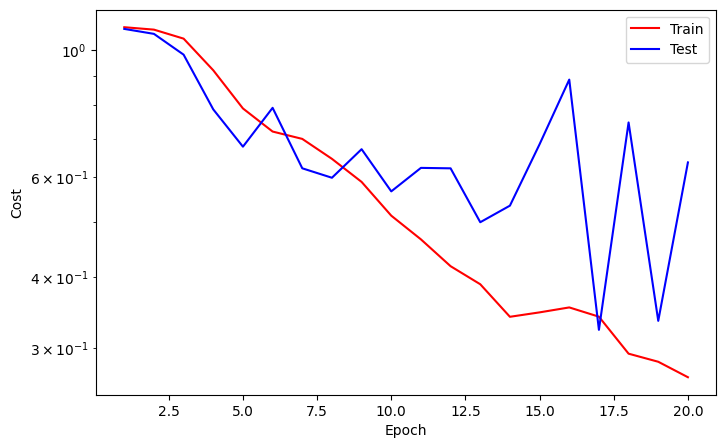

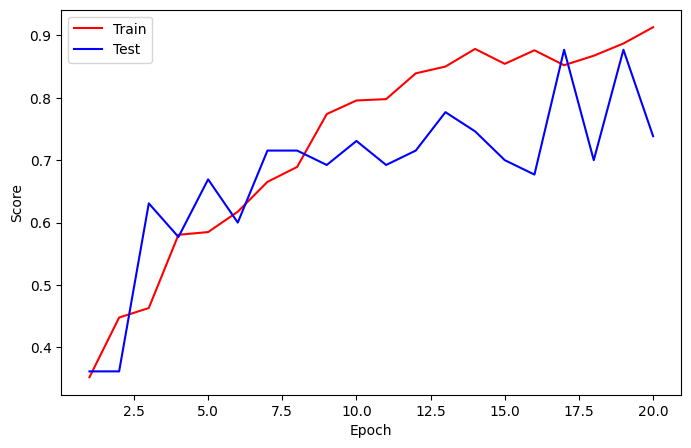

==> EarlyStop patience =  3 | Best test_score: 0.8769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2382 | Test_cost  = 0.3852 | Train_score = 0.9022 | Test_score = 0.8615 |
==> EarlyStop patience =  4 | Best test_score: 0.8769


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.2212 | Test_cost  = 0.5926 | Train_score = 0.9304 | Test_score = 0.7692 |
==> EarlyStop patience =  5 | Best test_score: 0.8769
==> Execute Early Stopping at epoch: 22 | Best test_score: 0.8769
==> Best model is saved at model


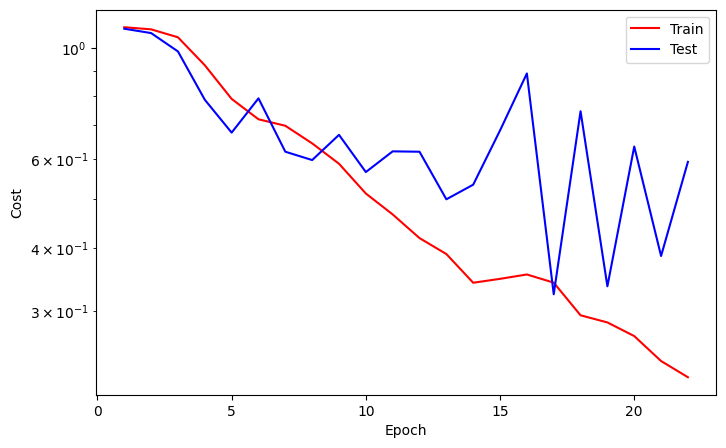

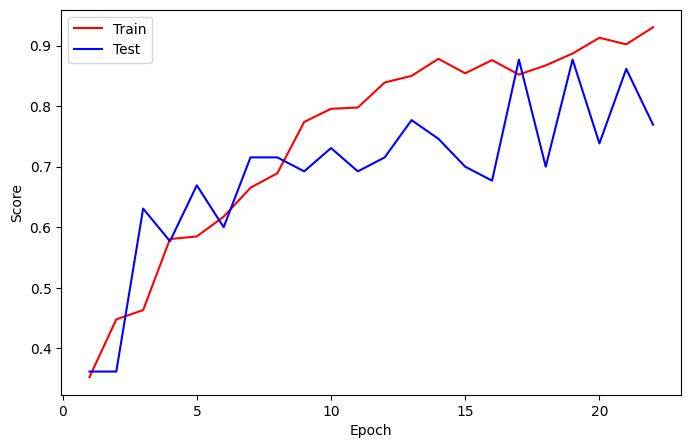

In [ ]:
while True:
    # Training
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)

    # Evaluation
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break


#Load Best Model

In [ ]:
# weights = torch.load("/content/model/weight_best.pth", map_location="cpu")
# config = torch.load("/content/model/configs.pth", map_location="cpu")
# model = CNN().to(device)
# model.load_state_dict(weights)
# model = model.to(device

In [ ]:
model

CNN(
  (conv): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1024, out_features=512, bia

#Predict

In [ ]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [ ]:
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)
preds

tensor([2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1,
        2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
        2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1,
        2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 2, 2, 0, 0, 2, 0])

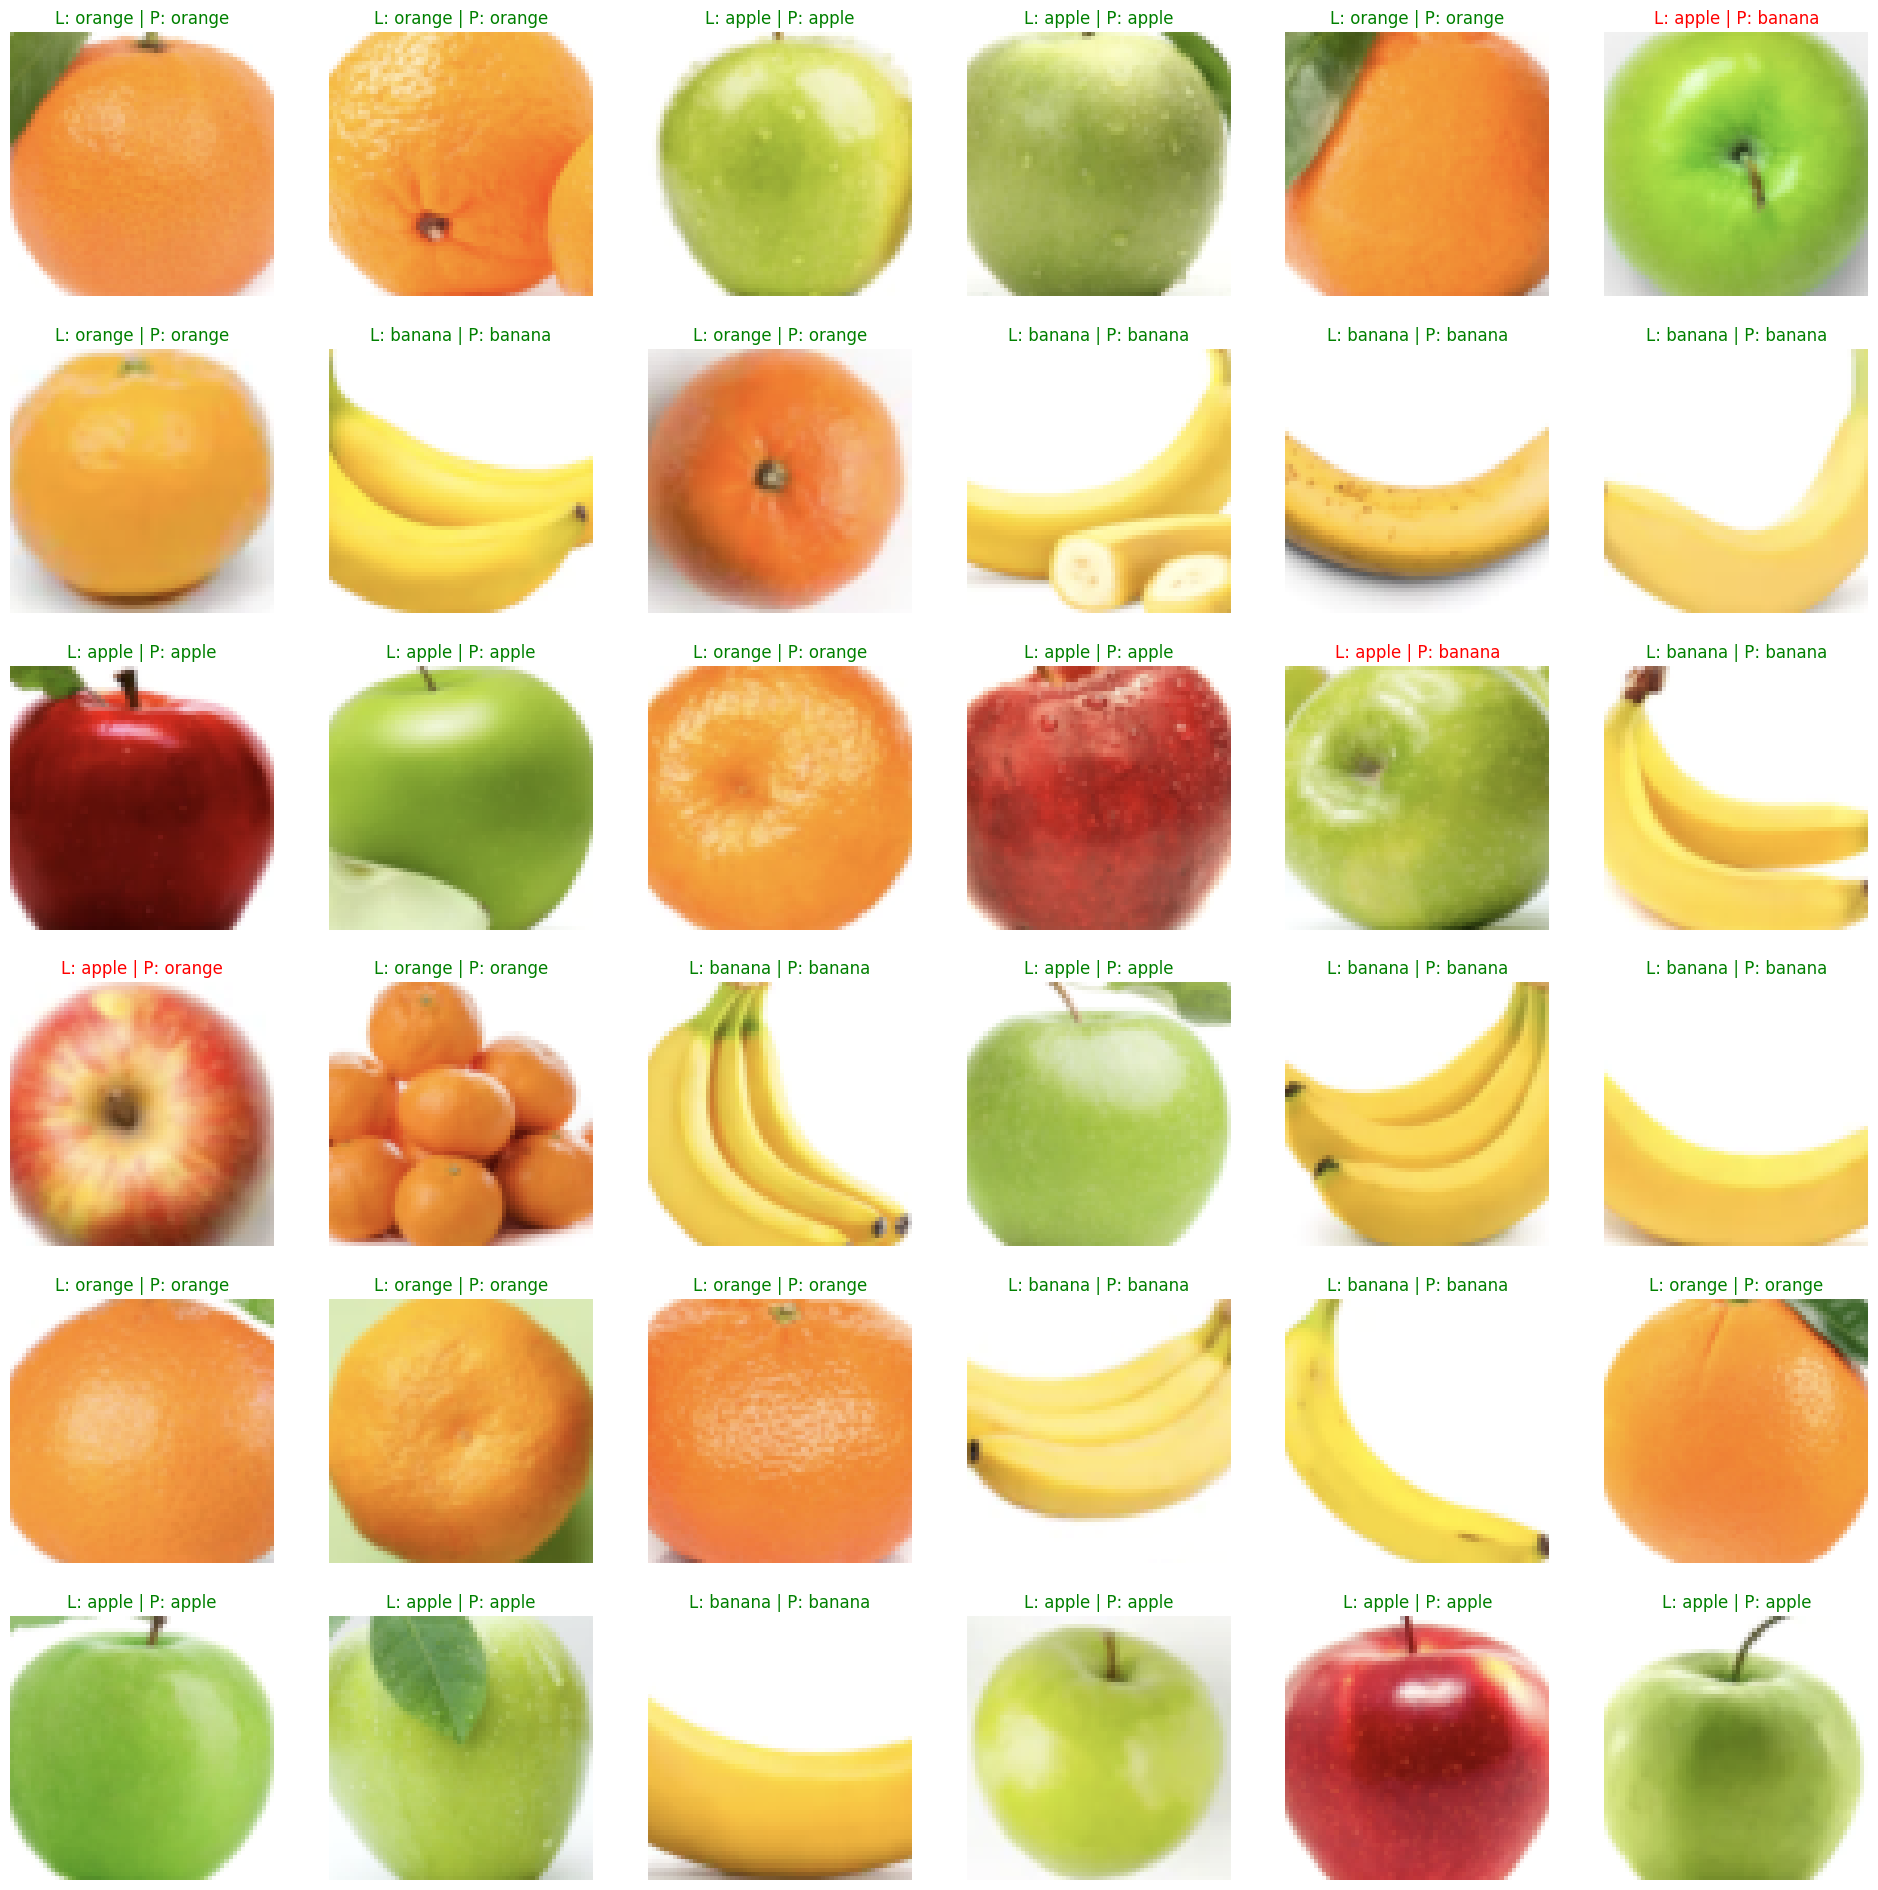

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for image, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"L: {label} | P: {pred}", fontdict=font)
    ax.axis('off')